In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
measurement = Base.classes.measurement
stations = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

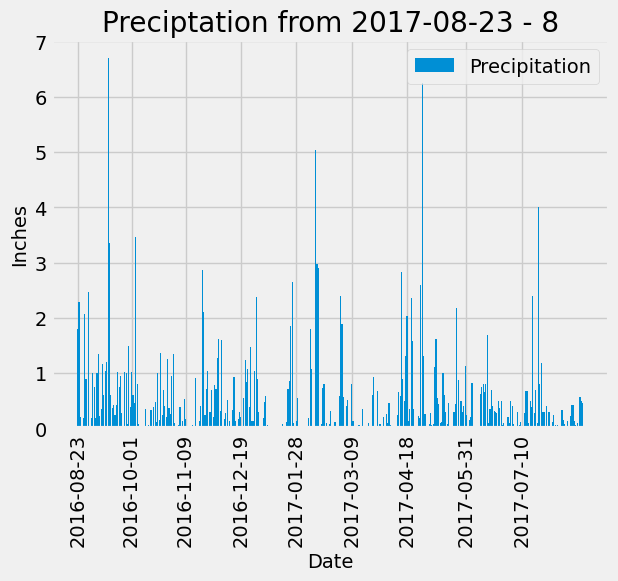

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_1 = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
year_1_precip_query = session.query(measurement.prcp, measurement.date).filter(measurement.date >= '2016-08-23', measurement.date <= '2017-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.read_sql_query(
    sql = year_1_precip_query.statement,
    con = engine
)
precip_df.rename(columns = {'prcp': 'Precipitation', 'date': 'Date'}, inplace = True)
# Sort the dataframe by date
precip_df.sort_values(by = 'Date', ascending = True, inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
x_values = precip_df['Date']
y_values = precip_df['Precipitation']
plt.bar(x_values, y_values, alpha = 1)
xtick = ['2016-08-23', 
        '2016-10-01', 
        '2016-11-09', 
        '2016-12-19', 
        '2017-01-28', 
        '2017-03-09', 
        '2017-04-18', 
        '2017-05-31', 
        '2017-07-10']
plt.legend(['Precipitation'])
plt.xticks(xtick, rotation = 'vertical')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Preciptation from 2017-08-23 - 8')
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_df = precip_df['Precipitation'].describe()
summary_df.to_frame(name = 'Precipitation')

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(stations.id).count()

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_min = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_max = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

print(most_active_min, most_active_max, most_active_avg)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


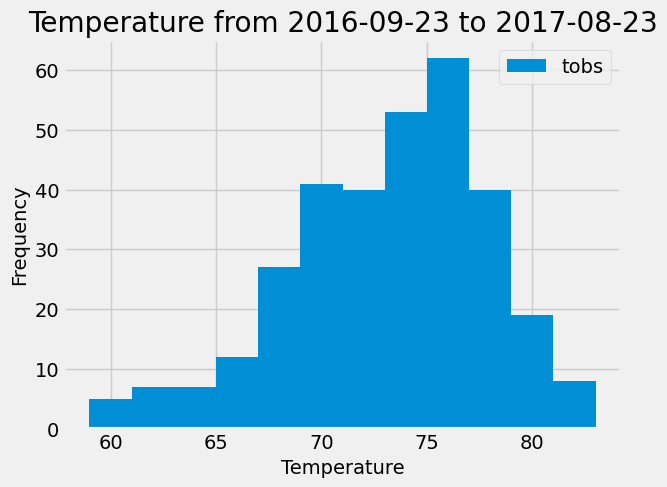

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_1_temp_query = session.query(measurement.tobs, measurement.date).filter\
    (measurement.date >= '2016-09-23', measurement.date <= '2017-08-23').filter(measurement.station =='USC00519281')
station_df = pd.read_sql_query(
    sql = year_1_temp_query.statement,
    con = engine
)
station_df.rename(columns = {'tobs': 'Temperature', 'date': 'Date'}, inplace = True)

x_values = station_df['Temperature']
plt.hist(x_values, bins = 12)

plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature from 2016-09-23 to 2017-08-23')
plt.show()

# Close Session

In [34]:
# Close Session
session.close()